In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. LOAD AND CLEAN DATA
df = pd.read_csv('data.csv')
df.columns = df.columns.str.strip()

In [3]:
# 2. DEFINE THE 5 "RED ZONE" SIGNALS
signals = [
    'Debt ratio %',
    'Net Income to Total Assets',
    'Cash Flow to Total Assets',
    'Net worth/Assets',
    'Liability-Assets Flag'
]

In [4]:
# 3. CALCULATE THE EVIDENCE (Averages)
analysis = df.groupby('Bankrupt?')[signals].mean().reset_index()

# Calculate the "Red Zone" Thresholds (the midpoint)
thresholds = analysis.drop(columns='Bankrupt?').mean()

print("DATA ANALYSIS OUTPUT")
print(analysis)
print("PROPOSED RED ZONE THRESHOLDS")
print(thresholds)

DATA ANALYSIS OUTPUT
   Bankrupt?  Debt ratio %  Net Income to Total Assets  \
0          0      0.110714                    0.810083   
1          1      0.187047                    0.738083   

   Cash Flow to Total Assets  Net worth/Assets  Liability-Assets Flag  
0                   0.650340          0.889286               0.000303  
1                   0.631452          0.812953               0.027273  
PROPOSED RED ZONE THRESHOLDS
Debt ratio %                  0.148881
Net Income to Total Assets    0.774083
Cash Flow to Total Assets     0.640896
Net worth/Assets              0.851119
Liability-Assets Flag         0.013788
dtype: float64


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Generated: signal_Debt_ratio_%.png


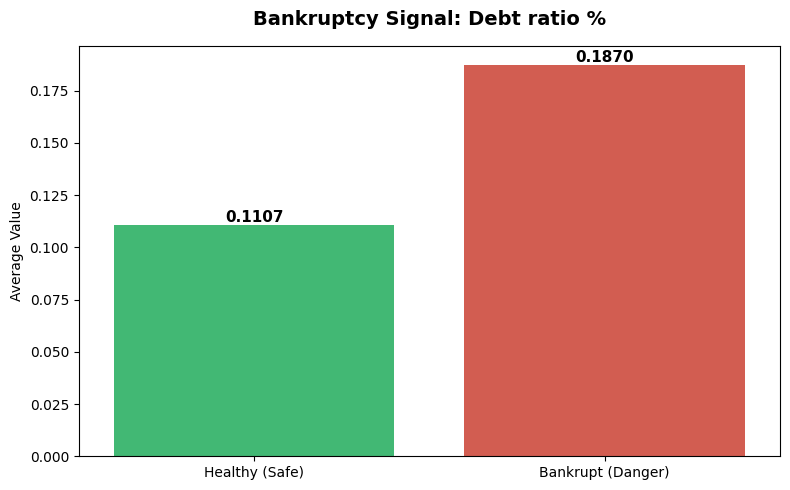


--------------------------------------------------

✅ Generated: signal_Net_Income_to_Total_Assets.png


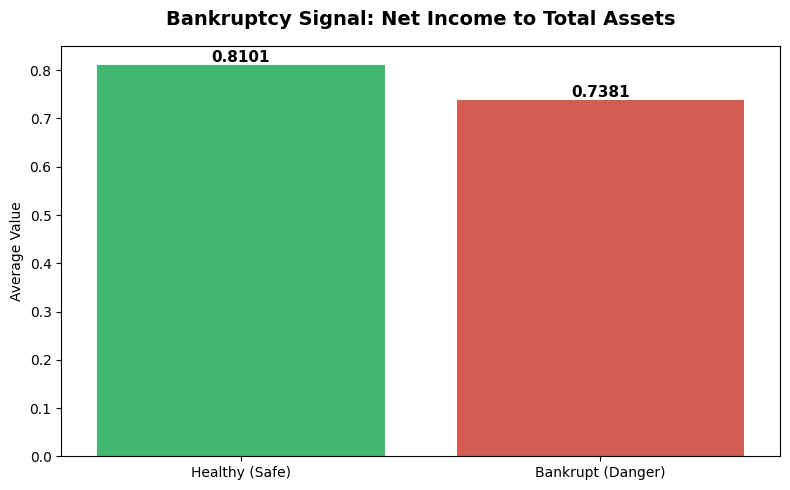


--------------------------------------------------

✅ Generated: signal_Cash_Flow_to_Total_Assets.png


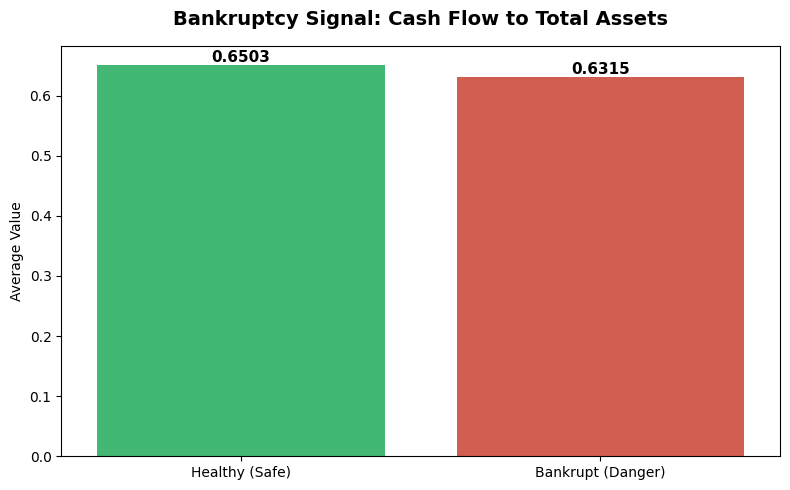


--------------------------------------------------

✅ Generated: signal_Net_worth_Assets.png


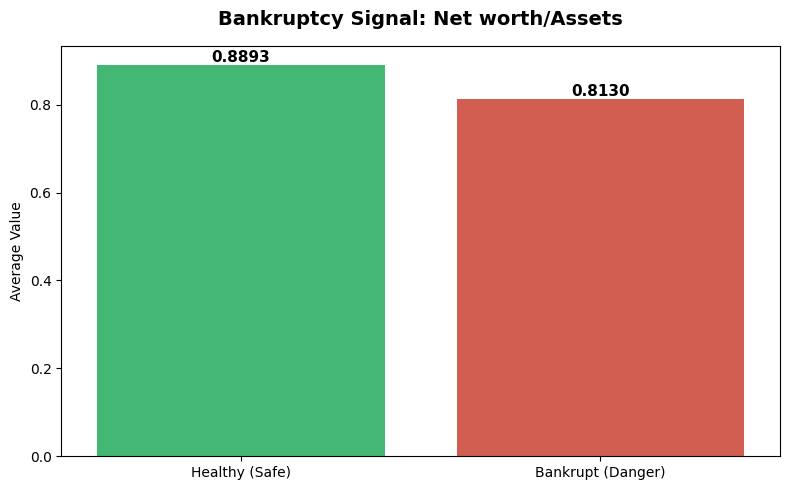


--------------------------------------------------

✅ Generated: signal_Liability-Assets_Flag.png


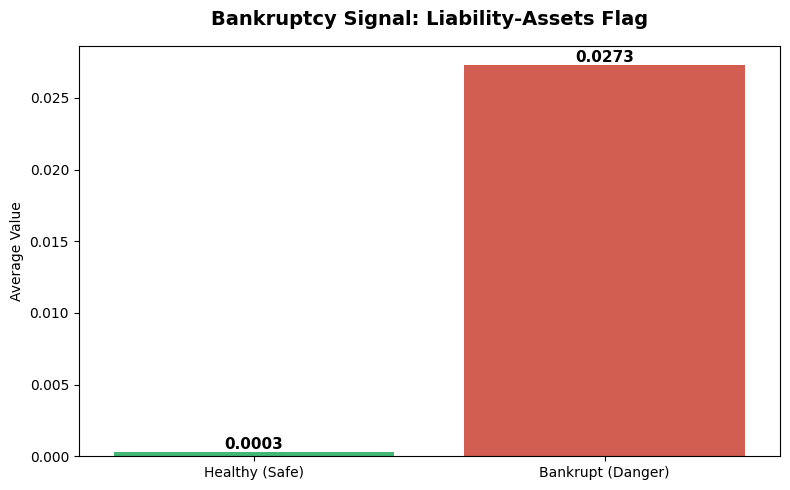


--------------------------------------------------



In [6]:
# 4. GENERATE CHARTS
for signal in signals:
        plt.figure(figsize=(8, 5))

        # Create the bar chart
        ax = sns.barplot(x='Bankrupt?', y=signal, data=analysis, palette=['#2ecc71', '#e74c3c'], hue='Bankrupt?', legend=False)

        # Add title and labels
        plt.title(f'Bankruptcy Signal: {signal}', fontsize=14, fontweight='bold', pad=15)
        plt.xticks([0, 1], ['Healthy (Safe)', 'Bankrupt (Danger)'])
        plt.ylabel('Average Value')
        plt.xlabel('')

        # Add the value labels on top of the bars
        for i, val in enumerate(analysis[signal]):
            plt.text(i, val, f'{val:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

        plt.tight_layout()

        # Save the file
        file_name = f"signal_{signal.replace(' ', '_').replace('/', '_')}.png"
        plt.savefig(file_name)
        print(f"Generated: {file_name}")

        plt.show()
        print("\n" + "-"*50 + "\n")